# Import necessary dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

# Load and merge datasets

## TODO 
- [x] Read about the dataset structure (winequality.names)
- [x] Load the winequality-white.csv and winequality-red.csv into Pandas DataFrames
- [x] Add `wine_type` as an attribute
- [x] Use `apply` method (and then pd.Categorical) to encode `quality_label` attribute (feature) with categorical values -> `low`, `medium`, `high`
    - Assume: <br/>
        'low' : $quality \in [0, 5)$, <br/>
        'medium' : $quality \in [5, 7)$, <br/>
        'high' : $quality \in [7, 10]$,
- [x] merge red and white wine datasets and assign it to `wines` variable
- [x] re-shuffle records to randomize data points

In [2]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')

white_wine['wine_type'] = 'white'
red_wine['wine_type'] = 'red'

def get_quality_label(quality):
    if quality < 5 : return 'low'
    elif quality < 7 : return 'medium'
    else : return 'high'

white_wine['quality_label'] = white_wine['quality'].apply(get_quality_label)
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low', 'medium', 'high'])
red_wine['quality_label'] = red_wine['quality'].apply(get_quality_label)
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low', 'medium', 'high'])
wines = pd.concat([white_wine, red_wine])

wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)


# Understand dataset features and values

In [3]:
# print head of dataset as a help and then read the dataset description below
wines.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white,high
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,white,high
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,white,medium
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white,medium
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white,medium


### Understanding Wine and Types

Wine is an alcoholic beverage made from grapes which is fermented without the addition of sugars, acids, enzymes, water, or other nutrients

Red wine is made from dark red and black grapes. The color usually ranges from various shades of red, brown and violet. This is produced with whole grapes including the skin which adds to the color and flavor of red wines, giving it a rich flavor.

White wine is made from white grapes with no skins or seeds. The color is usually straw-yellow, yellow-green, or yellow-gold. Most white wines have a light and fruity flavor as compared to richer red wines.

### Understanding Wine Attributes and Properties 


- **fixed acidity:** Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine. Reducing acids significantly might lead to wines tasting flat. Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic). This variable is usually expressed in $\frac{g(tartaricacid)}{dm^3}$ in the dataset.


- **volatile acidity:** These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavor. In the US, the legal limits of volatile acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. The volatile acidity is expressed in $\frac{g(aceticacid)}{dm^3}$ in the dataset.


- **citric acid:** This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness. It's usually expressed in $\frac{g}{dm^3}$ in the dataset.


- **residual sugar:** This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped. It's usually expressed in $\frac{g}{dm^3}$ in the dataset.


- **chlorides:** This is usually a major contributor to saltiness in wine. It's usually expressed in $\frac{g(sodiumchloride)}{dm^3}$ in the dataset.


- **free sulfur dioxide:** This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. This variable is expressed in $\frac{mg}{dm^3}$ in the dataset.


- **total sulfur dioxide:** This is the sum total of the bound and the free sulfur dioxide ($SO_2$). Here, it's expressed in $\frac{mg}{dm^3}$. This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.


- **density:** This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. Here, it's expressed in $\frac{g}{cm^3}$.


- **pH:** Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.


- **sulphates:** These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavor. Here, it's expressed in $\frac{g(potassiumsulphate)}{dm^3}$ in the dataset.


- **alcohol:** Wine is an alcoholic beverage. Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine. Hence it is not a surprise for this attribute to be a part of this dataset. It's usually measured in % vol or alcohol by volume (ABV).


- **quality:** Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.


- **wine_type:** Since we originally had two datasets for red and white wine, we introduced this attribute in the final merged dataset which indicates the type of wine for each data point. A wine can either be a 'red' or a 'white' wine. One of the predictive models we will build in this chapter would be such that we can predict the type of wine by looking at other wine attributes.


- **quality_label:** This is a derived attribute from the `quality` attribute. We bucket or group wine quality scores into three qualitative buckets namely low, medium and high. Wines with a quality score of 3, 4 & 5 are low quality, scores of 6 & 7 are medium quality and scores of 8 & 9 are high quality wines. We will also build another model in this chapter to predict this wine quality label based on other wine attributes. 

# Exploratory Data Analysis and Visualizations

## Descriptive Statistics

Let’s do a quick basic descriptive summary statistics on some of these attributes of interest.

In [4]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)
pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [5]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(),2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(),2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(),2)
pd.concat([ls, ms, hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                                  Medium Quality Wine  \
               alcohol volatile acidity      pH quality             alcohol   
count           246.00           246.00  246.00  246.00             4974.00   
mean             10.18             0.47    3.23    3.88               10.27   
std               1.00             0.25    0.19    0.33                1.07   
min               8.00             0.11    2.74    3.00                8.00   
25%               9.40             0.28    3.09    4.00                9.40   
50%              10.05             0.38    3.22    4.00               10.00   
75%              10.90             0.61    3.36    4.00               11.00   
max              13.50             1.58    3.90    4.00               14.90   

                                         High Quality Wine                   \
      volatile acidity       pH  quality           alcohol volatile acidity   
count          4974.00  4974.00  4974.00           1277.00          1277.00   
mean              0.35     3.22     5.57             11.43             0.29   
std               0.17     0.16     0.50              1.22             0.12   
min               0.08     2.72     5.00              8.50             0.08   
25%               0.23     3.11     5.00             10.70             0.20   
50%               0.30     3.20     6.00             11.50             0.27   
75%               0.42     3.32     6.00             12.40             0.34   
max               1.33     4.01     6.00             14.20             0.92   

                         
            pH  quality  
count  1277.00  1277.00  
mean      3.23     7.16  
std       0.16     0.38  
min       2.84     7.00  
25%       3.12     7.00  
50%       3.22     7.00  
75%       3.34     7.00  
max       3.82     9.00

# Univariate Analysis
Univariate analysis is basically the simplest form of data analysis or visualization where we are only concerned with analyzing one data attribute or variable and visualizing the same (one dimension).

## Visualizing one dimension

## TODO

- [x] One of the quickest and most effective ways to visualize all numeric data and their distributions, is to leverage histograms using pandas. Plot histograms, which will give you a good idea about the basic data distribution of any of the attributes.



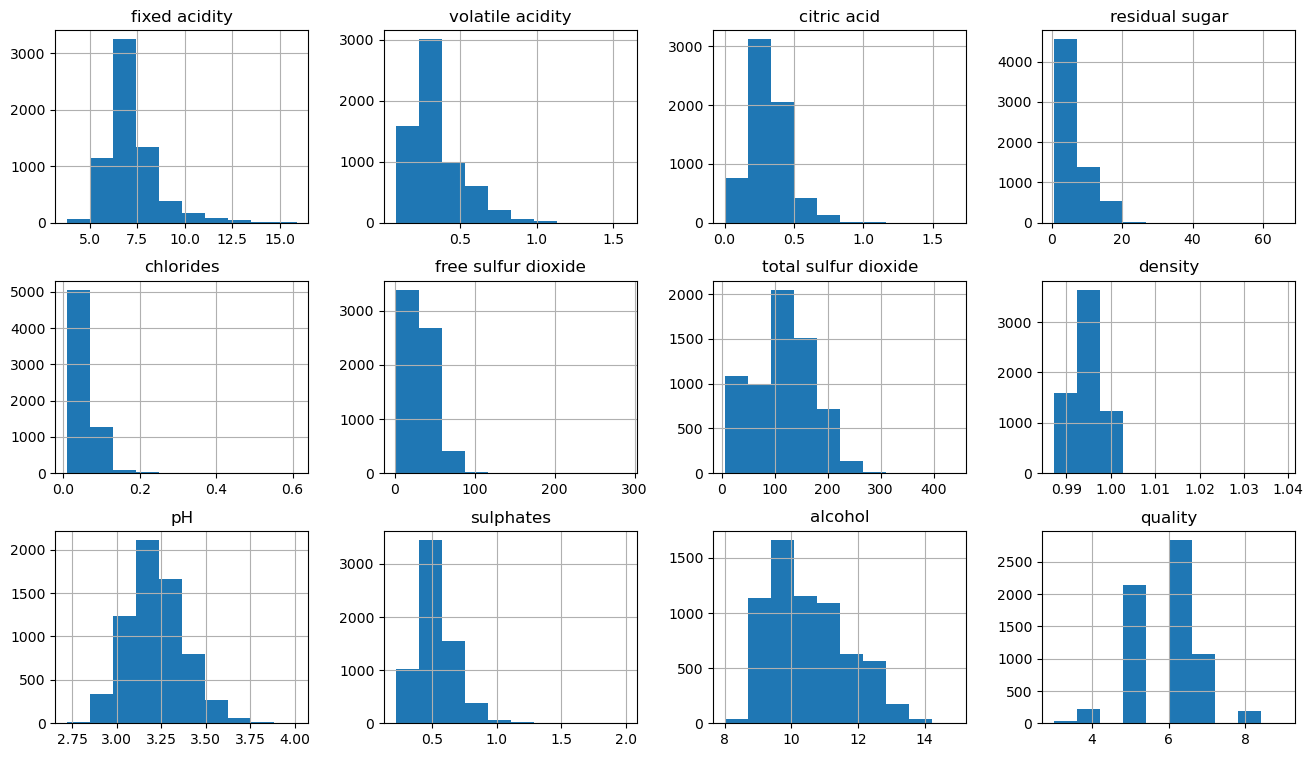

In [6]:
wines.hist(figsize=(16,9), layout=(3,4));


### Continuous, numeric attribute in 1-D

## TODO

- [x] Choose one attribute and plot it in continuous space side-by-side with its histogram. You can use `seaborn kdeplot`.


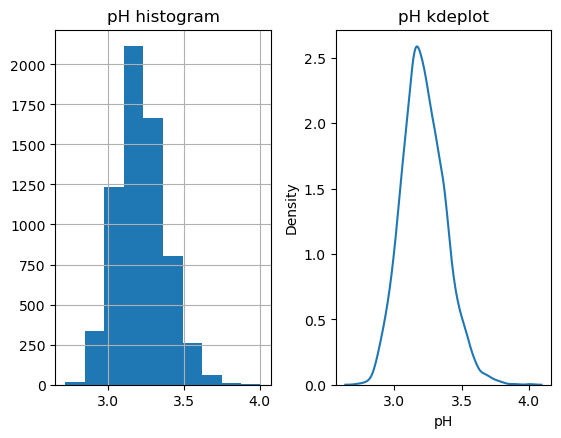

In [7]:
fig, ax = plt.subplots(1,2)
fig.subplots_adjust(top=0.85, wspace=0.3)
wines['pH'].hist(ax = ax[0])
sns.kdeplot(wines['pH'], ax=ax[1])
ax[0].set_title("pH histogram")
ax[1].set_title("pH kdeplot")
plt.show()

### Discrete, categorical attribute in 1-D

## TODO
- [x] Visualizing a discrete, categorical data attribute is slightly different and `bar plots` are one of the most effective ways to do the same. Use it, to visualize `quality`.

<AxesSubplot:title={'center':'Quality bar plot'}, xlabel='quality'>

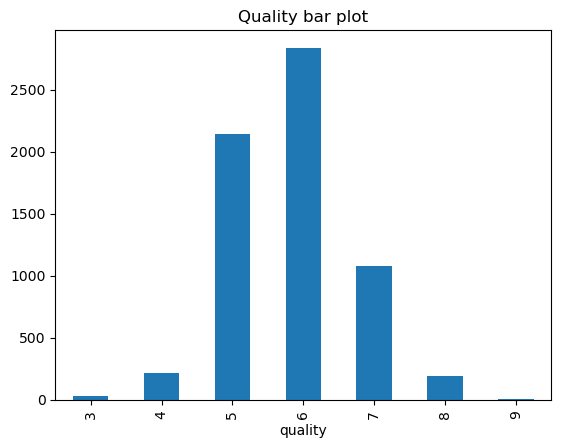

In [8]:
plt.title("Quality bar plot")
wines.groupby('quality')['quality_label'].count().plot.bar()

# Multivariate Analysis

Multivariate analysis is where the fun as well as the complexity begins. Here we analyze multiple data dimensions or attributes (2 or more). Multivariate analysis not only involves just checking out distributions but also potential relationships, patterns and correlations amongst these attributes.

## Visualizing two dimensions

## TODO

- [x] One of the best ways to check out potential relationships or correlations amongst the different data attributes is to leverage a pair-wise correlation matrix (pandas `corr`) and depict it as a seaborn `heatmap`. Do it ;)

<AxesSubplot:title={'center':'Correlation matrix'}>

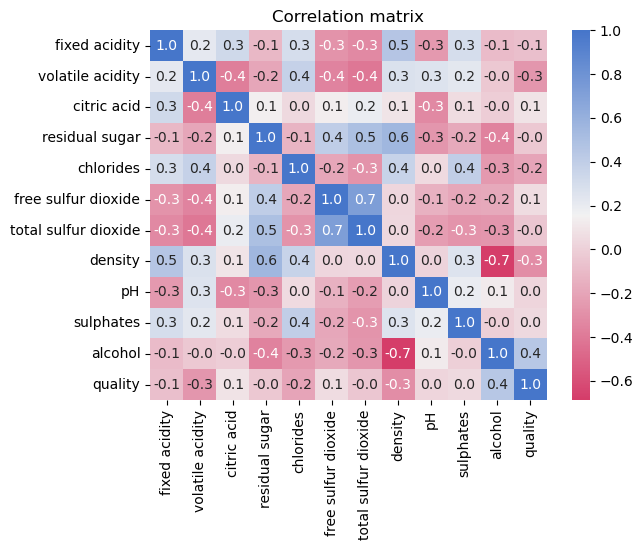

In [9]:
plt.title("Correlation matrix")
sns.heatmap(wines.corr(), annot=True, fmt=".1f", cmap=sns.diverging_palette(0,255,as_cmap=True))

## TODO

The gradients in the heatmap vary based on the strength of the correlation and you can clearly see it is very easy to spot potential attributes having strong correlations amongst themselves. Another way to visualize the same is to use pair-wise scatter plots amongst attributes of interest.

 - [x] Use seaborn `pairplot` to plot correlation between 4 columns of your choosing (e.g. `cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']`)

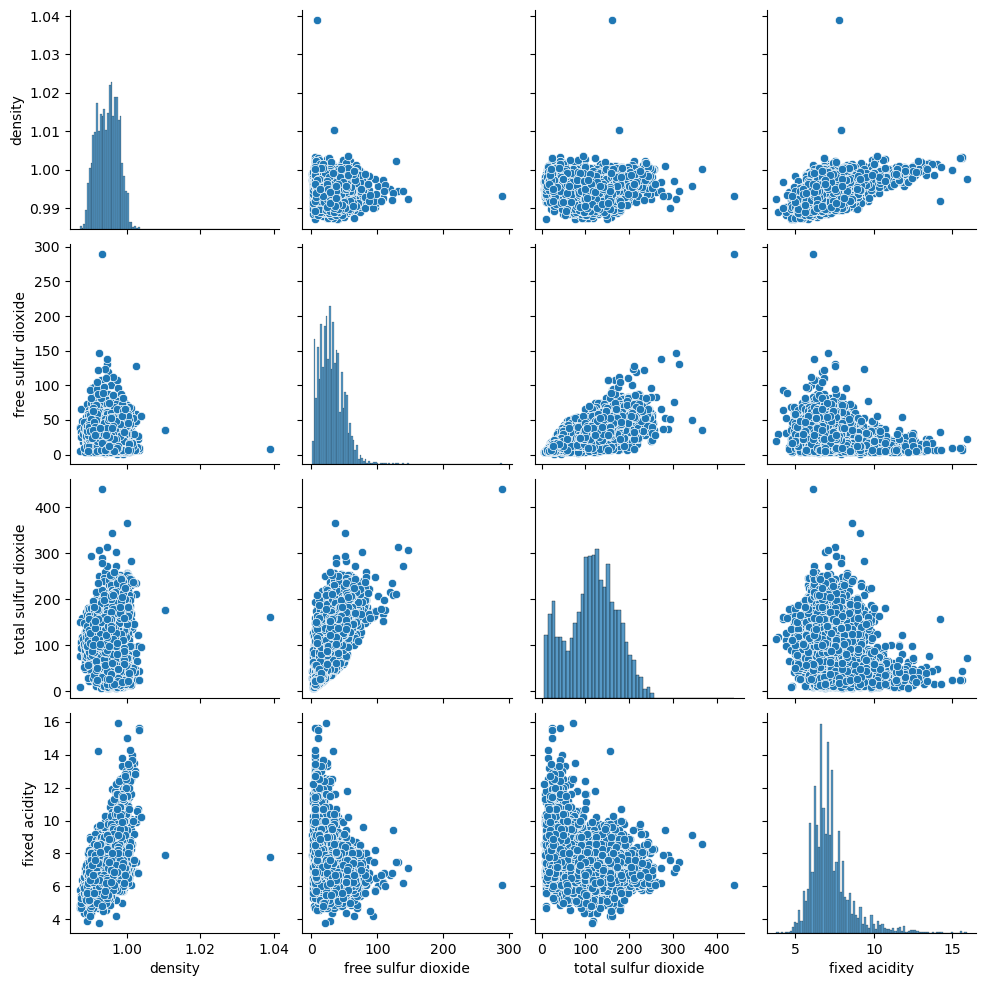

In [10]:
cols = ['density', 'free sulfur dioxide', 'total sulfur dioxide', 'fixed acidity']
sns.pairplot(wines[cols])

## TODO

- [x] Yet another way of visualizing multivariate data for multiple attributes together is to use parallel coordinates.

`from pandas.plotting import parallel_coordinates`  

To do it, it's recommended to scale your data accordingly before plotting. 
- [x] Use `StandardScaler` from `sklearn`.


Text(0.5, 1.0, 'Paralel coordinates plot')

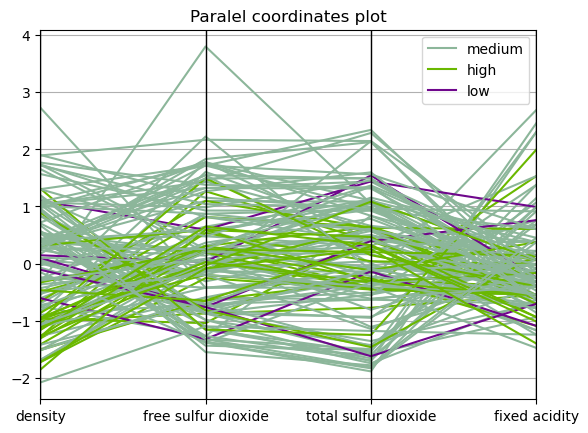

In [11]:
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(wines[cols]), columns=cols)
parallel_coordinates(pd.concat([scaled_df,wines['quality_label']], axis=1).sample(frac=0.02), 'quality_label')
plt.title("Paralel coordinates plot")


### Two Continuous Numeric attributes 

## TODO

To visualize two continuous, numeric attributes, we can use scatter plots and joint plots. The second one in particular are good to not only check for patterns, relationships but also see the individual distributions for the attributes.

- [x] Choose two proper attributes (e.q. `sulphates` and `alcohol`) and plot it with scatter plot and jointplot.

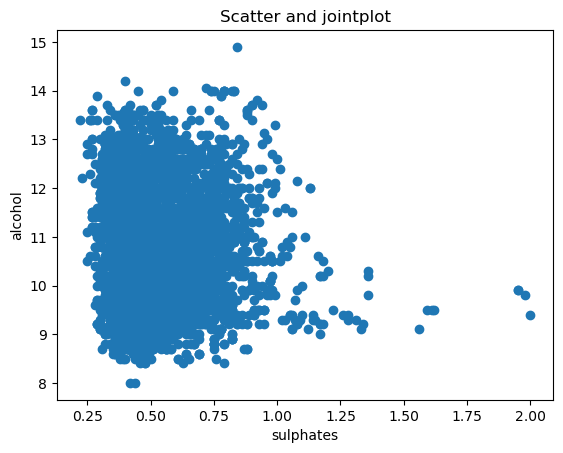

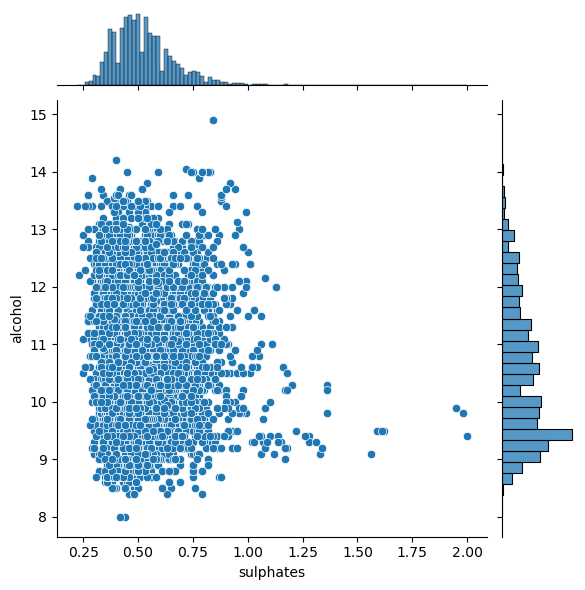

In [12]:
plt.title("Scatter and jointplot")
plt.xlabel("sulphates")
plt.ylabel("alcohol")
scatter = plt.scatter(x=wines['sulphates'], y=wines['alcohol'])

jointplot = sns.jointplot(data=wines, x="sulphates", y="alcohol")

### Two Discrete Categorical attributes 

To visualize two discrete, categorical attributes we can leverage separate plots (subplots) or facets for one of the categorical dimensions.



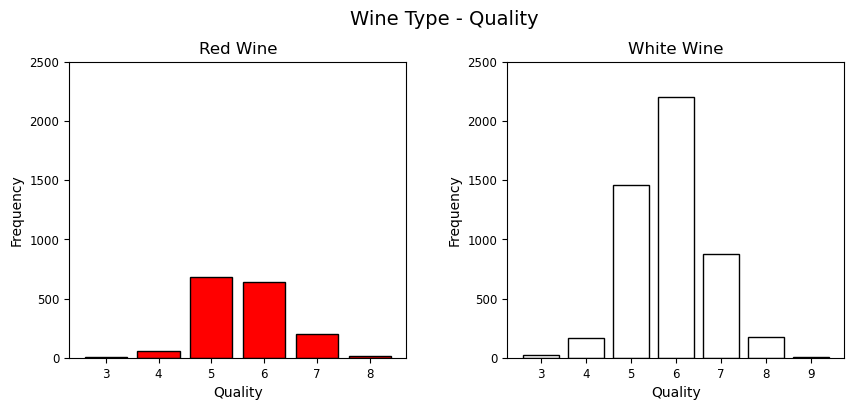

In [13]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', 
        edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', 
        edgecolor='black', linewidth=1)

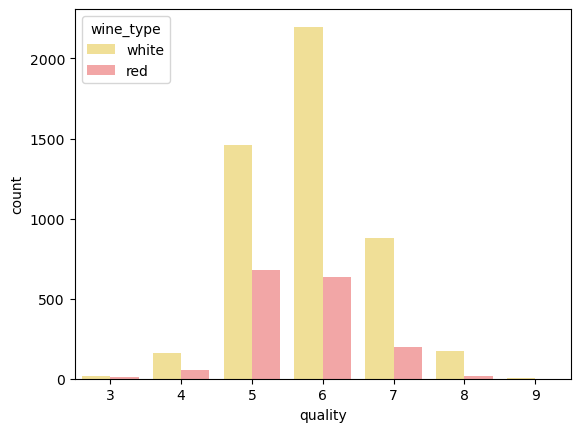

In [14]:
cp = sns.countplot(x="quality", hue="wine_type", data=wines, 
                   palette={"red": "#FF9999", "white": "#FFE888"})

### Mixed attributes (numeric & categorical)

To visualize mixed attributes in two-dimensions (essentially numeric and categorical together), we cab use faceting\subplots along with generic histograms or density plots.

- [x] Use example above to plot "Sulphates content in wine" histograms and facets (`Frequency`/`Density` and `Sulphates` as axis) for different types of wine.

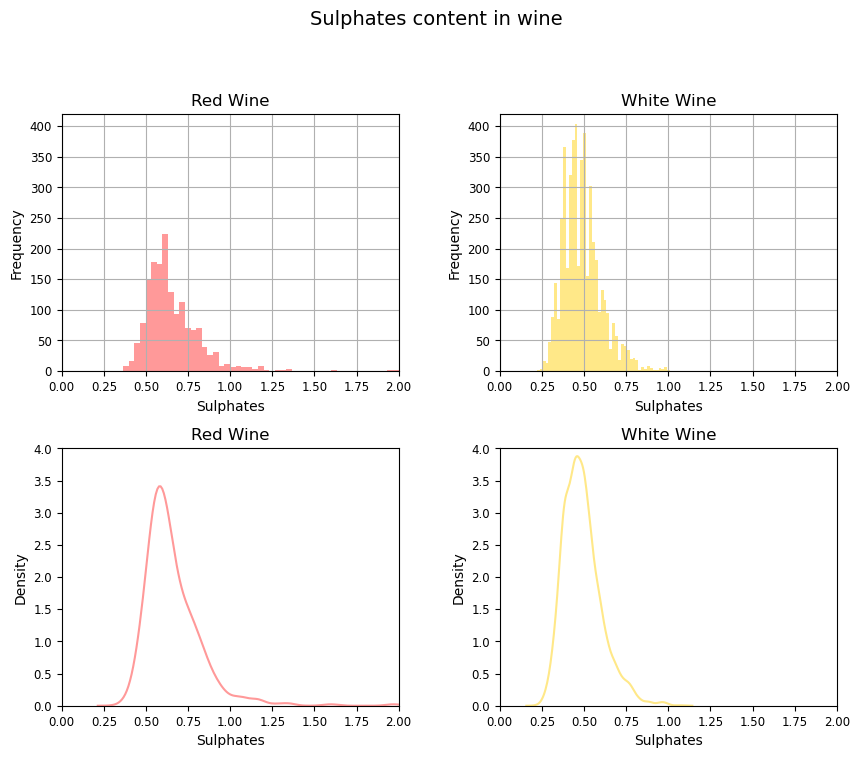

In [15]:
fig = plt.figure(figsize = (10, 8))
title = fig.suptitle("Sulphates content in wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3, hspace=0.3)
spec = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(spec[0,0])
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 420])
ax1.set_xlim([0, 2])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
rw_q = red_wine['sulphates'].hist(ax=ax1, bins=50, color="#FF9999")


ax2 = fig.add_subplot(spec[0,1])
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency") 
ax2.set_ylim([0, 420])
ax2.set_xlim([0, 2])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
ww_q = white_wine['sulphates'].hist(ax=ax2, bins=50, color="#FFE888")


ax3 = fig.add_subplot(spec[1,0])
ax3.set_title("Red Wine")
ax3.set_xlabel("Sulphates")
ax3.set_ylabel("Density") 
ax3.set_ylim([0, 4])
ax3.set_xlim([0, 2])
ax3.tick_params(axis='both', which='major', labelsize=8.5)
rw_q = sns.kdeplot(x="sulphates", data=wines[wines["wine_type"]=='red'], color="#FF9999", ax=ax3)
# palette={"red": "#FF9999", "white": "#FFE888"}
ax4 = fig.add_subplot(spec[1,1])
ax4.set_title("White Wine")
ax4.set_xlabel("Sulphates")
ax4.set_ylabel("Density") 
ax4.set_ylim([0, 4])
ax4.set_xlim([0, 2])
ax4.tick_params(axis='both', which='major', labelsize=8.5)
ww_q = sns.kdeplot(x="sulphates", data=wines[wines["wine_type"]=='white'], color="#FFE888",  ax=ax4)

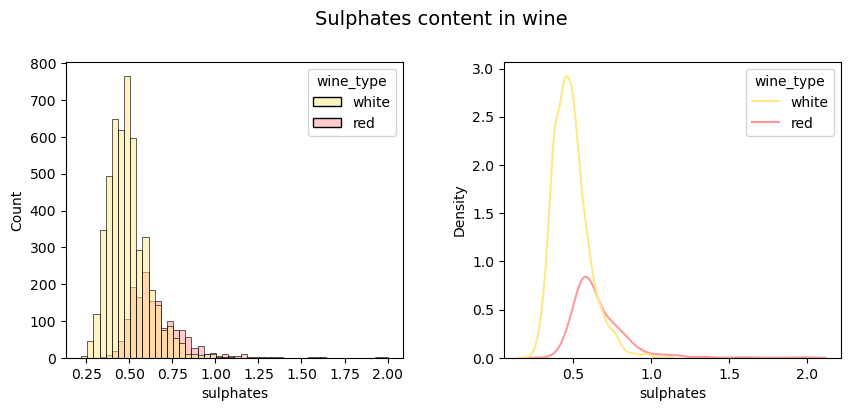

In [16]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Sulphates content in wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3, hspace=0.3)
spec = fig.add_gridspec(1, 2)

ax1 = fig.add_subplot(spec[0,0])
cp = sns.histplot(x="sulphates", hue="wine_type", data=wines, 
                   palette={"red": "#FF9999", "white": "#FFE888"}, bins = 50 ,ax=ax1)
ax2 = fig.add_subplot(spec[0,1])

kdp = sns.kdeplot(x="sulphates",hue="wine_type", data=wines, 
                   palette={"red": "#FF9999", "white": "#FFE888"}, ax=ax2)

## TODO 

Box plots are effective in depicting groups of numeric data based on the different values in the categorical attribute. Additionally, they are a good way to know the quartile values in the data and also potential outliers.

- [x] Plot a `boxplot` for `quality` and `alcohol` as axis. 
- [x] Then do the same for `violinplot` and verify the differences between the two.

<AxesSubplot:title={'center':'Boxplot of alcohol based on quality'}, xlabel='quality', ylabel='alcohol'>

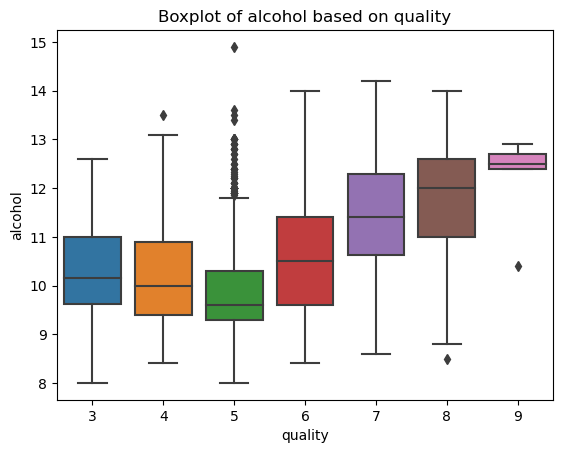

In [17]:
plt.title("Boxplot of alcohol based on quality")
sns.boxplot(x='quality', y='alcohol', data=wines,)

<AxesSubplot:title={'center':'Violinplot of alcohol based on quality'}, xlabel='quality', ylabel='alcohol'>

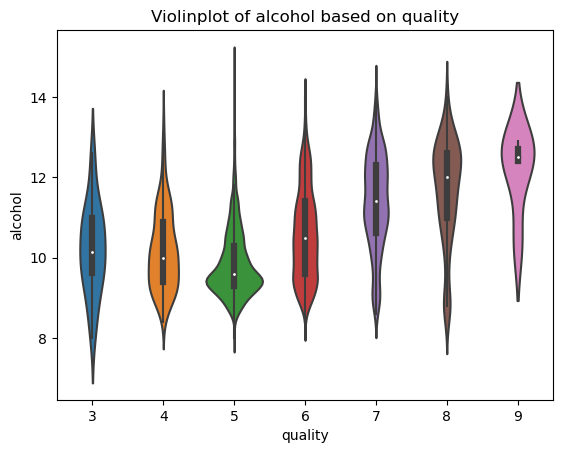

In [18]:
plt.title("Violinplot of alcohol based on quality")
sns.violinplot(x='quality', y='alcohol', data=wines)

## Visualizing three dimensions

We can visualize them by considering a pair-wise scatter plot and introducing the notion of color or hue to separate out values in a categorical dimension.

- [x] Plot 5 columns of your choosing with `wine_type` (one of columns) as 3rd dimension.

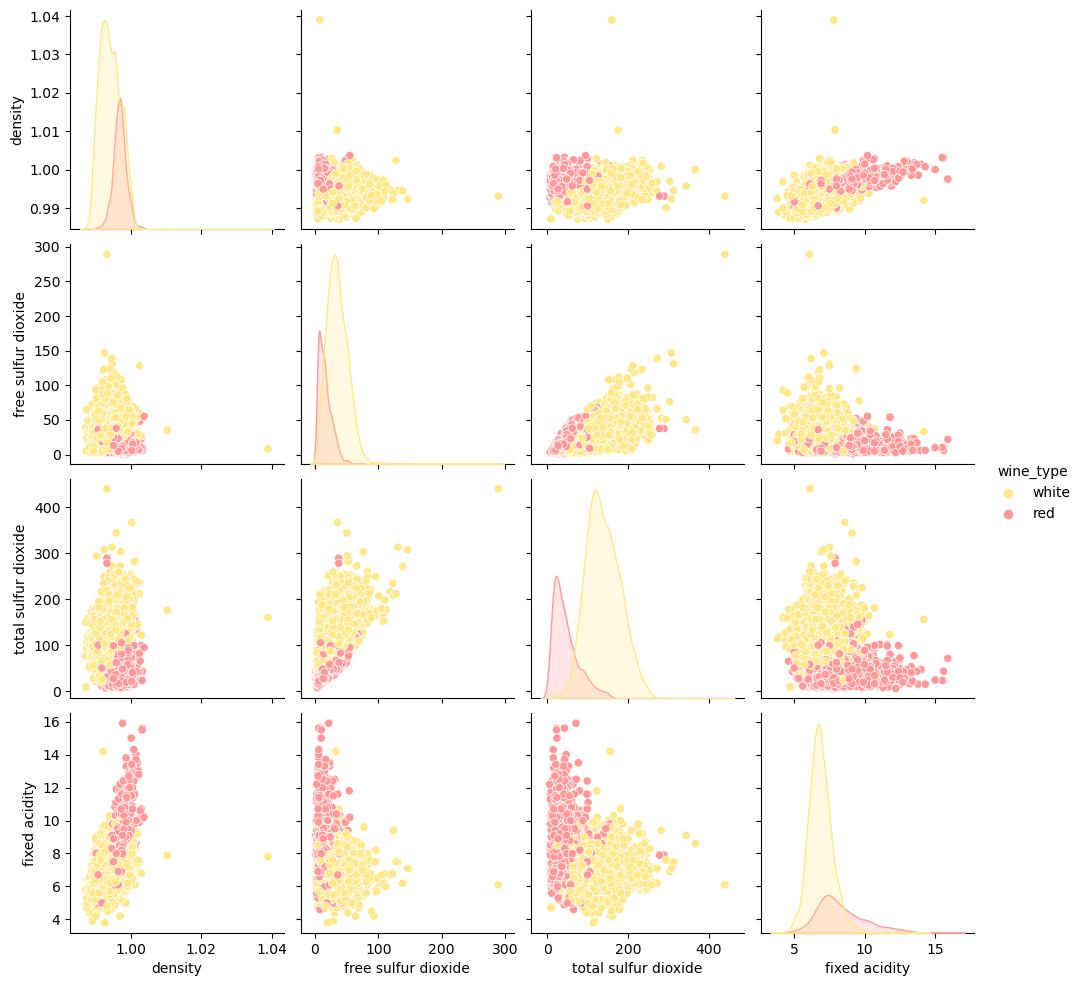

In [19]:
cols = ['density', 'free sulfur dioxide', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
sns.pairplot(wines[cols], hue="wine_type",
                   palette={"red": "#FF9999", "white": "#FFE888"})

### Three Continuous Numeric attributes

Text(0.5, 0, 'Alcohol')

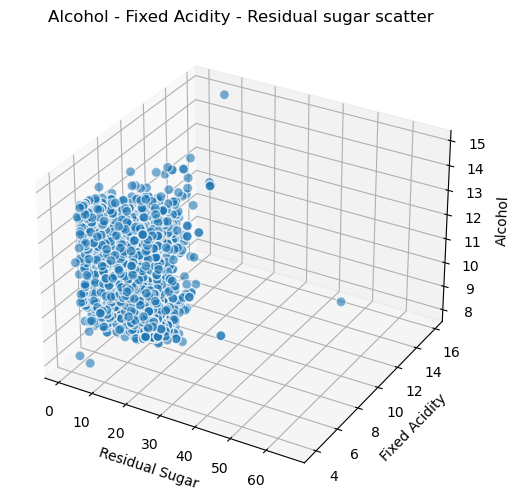

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')
ax.set_title('Alcohol - Fixed Acidity - Residual sugar scatter')
ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

## TODO

We can utilize size as the third dimension, where the size of the dots indicate the quantity of the third dimension.

- [x] Use `s` parameter of scatter plot to parametrize it by the size. Use `residual sugar` as the size indicator.

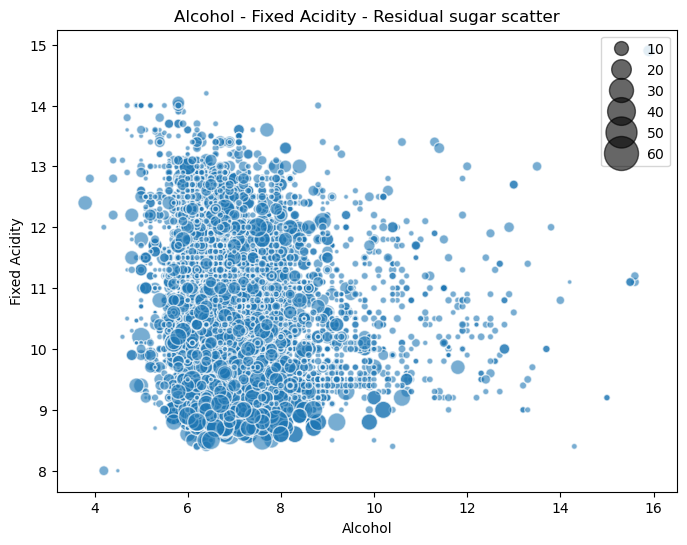

In [21]:
fig = plt.figure(figsize=(8, 6))

s = wines['residual sugar']
xs = wines['fixed acidity']
ys = wines['alcohol']
sc = plt.scatter(xs, ys, s=s*10, alpha=0.6, edgecolors='w')

plt.xlabel('Alcohol')
plt.ylabel('Fixed Acidity')
plt.title('Alcohol - Fixed Acidity - Residual sugar scatter')
plt.legend(*sc.legend_elements("sizes", num=5,func=lambda x: x/10))
# ax.set_zlabel('')

### Three Discrete Categorical attributes

C:\Users\piotr\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


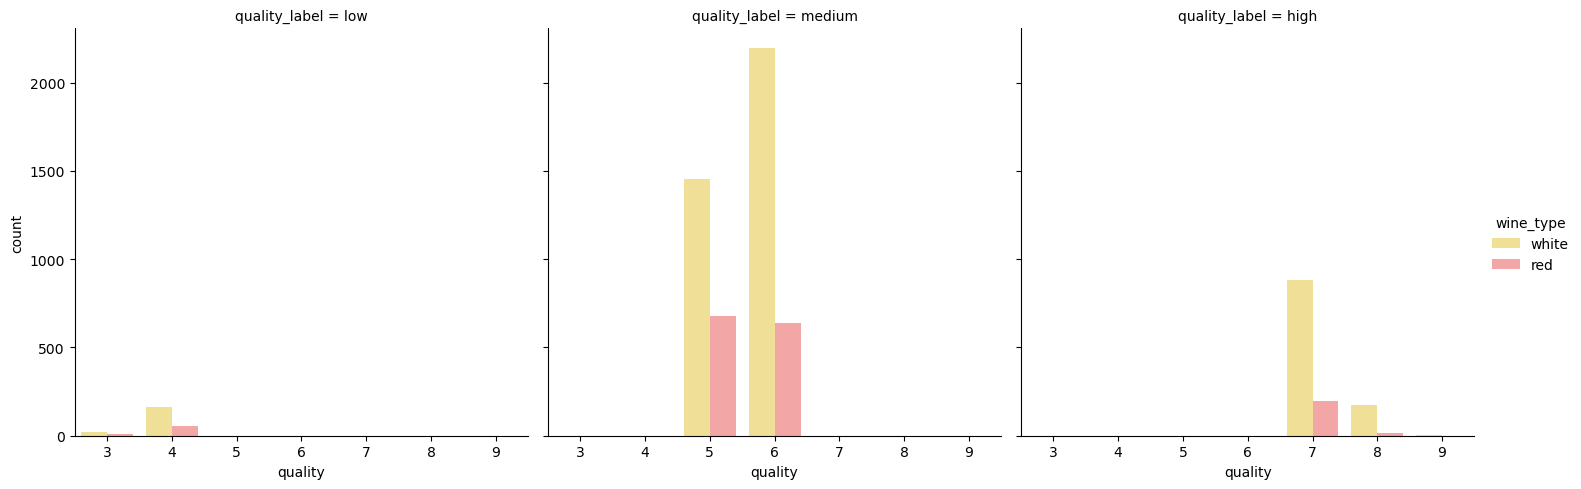

In [22]:
fc = sns.factorplot(x="quality", hue="wine_type", col="quality_label", 
                    data=wines, kind="count",
                    palette={"red": "#FF9999", "white": "#FFE888"})

### Mixed attributes (Numeric & Categorical)

C:\Users\piotr\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


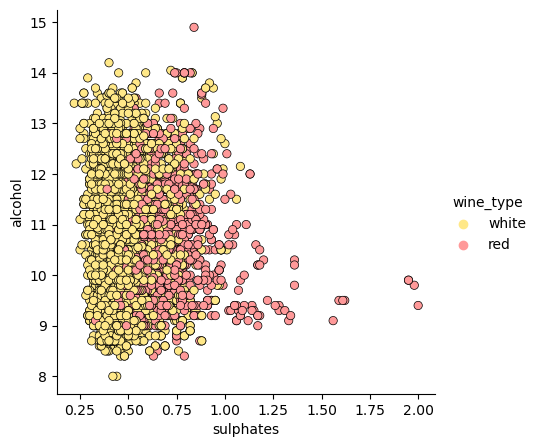

In [23]:
jp = sns.pairplot(wines, x_vars=["sulphates"], y_vars=["alcohol"], size=4.5,
                  hue="wine_type", palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="k", linewidth=0.5))

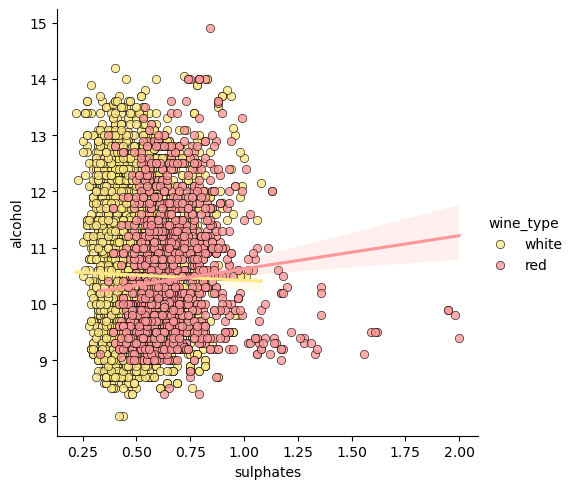

In [24]:
lp = sns.lmplot(x='sulphates', y='alcohol', hue='wine_type', 
                palette={"red": "#FF9999", "white": "#FFE888"},
                data=wines, fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

## TODO 

Thus hue acts as a good separator for the categories or groups and while there is no or very weak correlation as observed above, we can still understand from these plots that `sulphates` are slightly higher for red wines as compared to white. 

- [x] Instead of a scatter plot, use a kernel density plot (`kdeplot`) to understand the data in three dimensions.

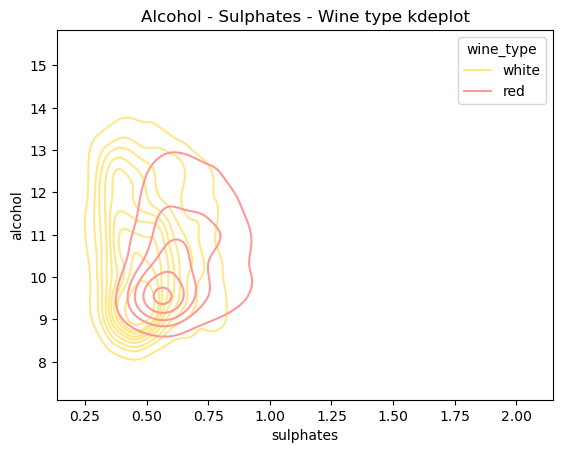

In [25]:
plt.title("Alcohol - Sulphates - Wine type kdeplot")
kdp3 = sns.kdeplot(data=wines, x="sulphates", y="alcohol",
                  hue="wine_type", palette={"red": "#FF9999", "white": "#FFE888"})

## TODO 

- [x] Use hue and one of the regular axes for visualizing data and use visualizations like box plots or violin plots to visualize the different groups of data.

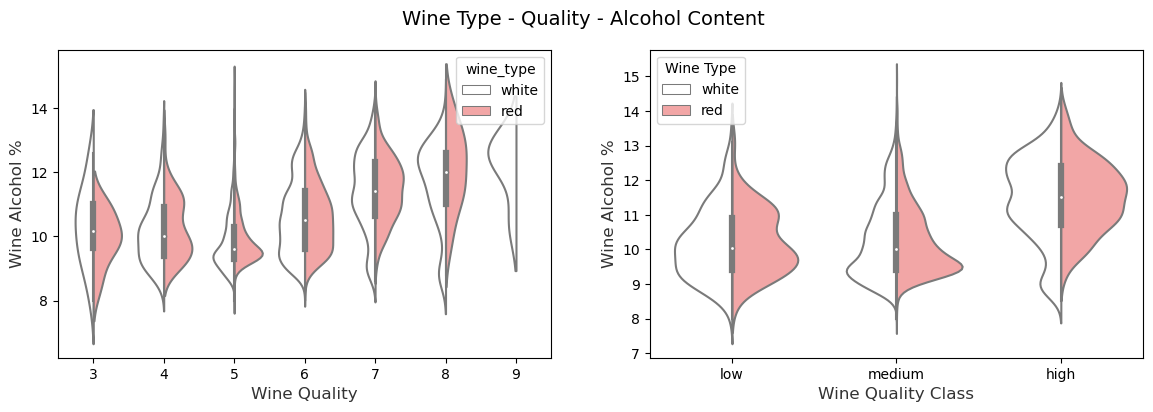

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.violinplot(x="quality", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax1, split=True)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.violinplot(x="quality_label", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax2, split=True)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')

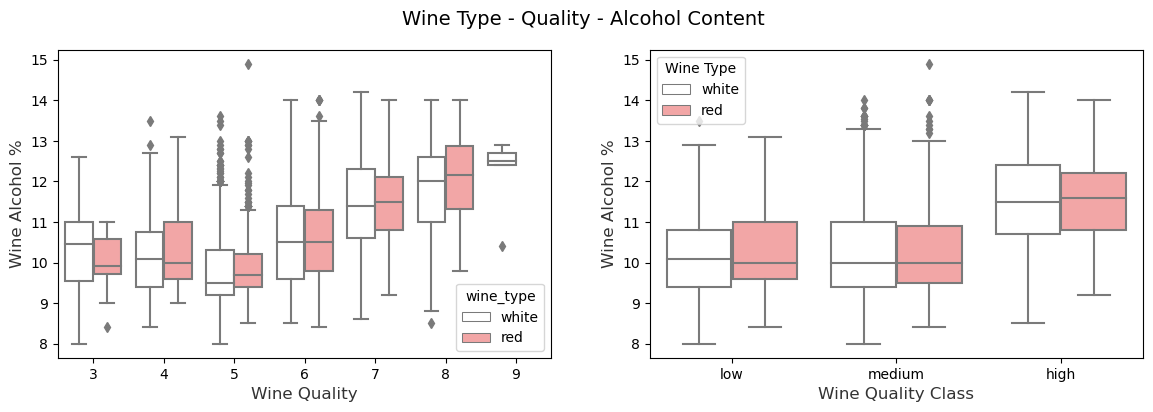

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')

## Visualizing four dimensions

We will leverage various components of the charts visualize multiple dimensions. One way to visualize data in four dimensions is to use `depth` and `hue` as specific data dimensions in a conventional plot like a scatter plot.

- [x] Use: `xs`, `ys`, `zs` for plot (tips: use `zip`) and specify color by the `wine_type`. 

Text(0.5, 0, 'Alcohol')

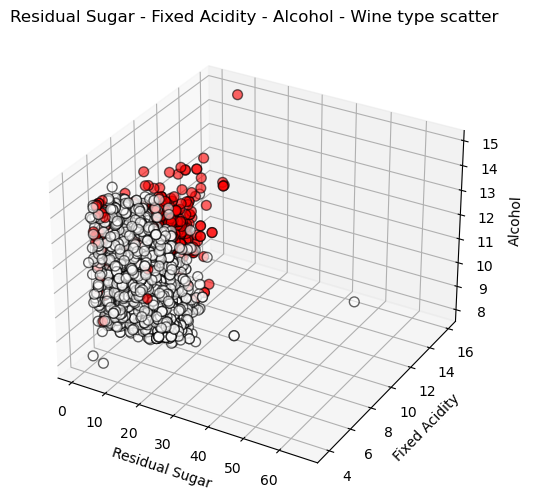

In [28]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
cs = wines['wine_type']
ax.scatter(xs, ys, zs, c=cs, s=50, alpha=0.6, edgecolors='black')
ax.set_title('Residual Sugar - Fixed Acidity - Alcohol - Wine type scatter')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

## TODO 

- [x] Another strategy is to keep a 2-D plot but use hue and data point size as data dimensions. Typically this would be a bubble chart similar to what we visualized earlier. Create bubble plot with specified size and color.

<AxesSubplot:title={'center':'Alcohol - Fixed Acidity - Wine type - Residual sugar bubbleplot'}, xlabel='alcohol', ylabel='fixed acidity'>

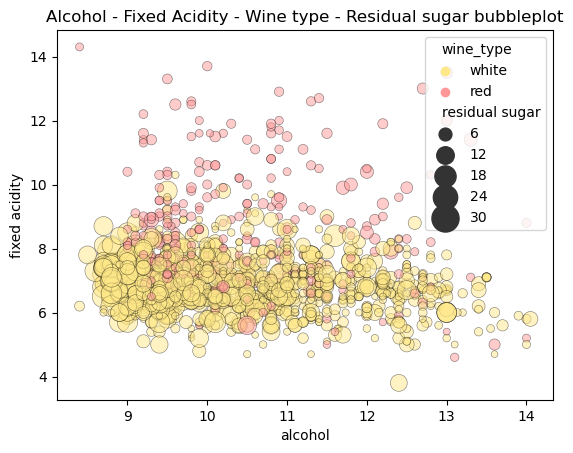

In [29]:
plt.title("Alcohol - Fixed Acidity - Wine type - Residual sugar bubbleplot")
sns.scatterplot(data=wines.sample(frac=0.2), x='alcohol', y='fixed acidity', size='residual sugar',alpha=0.5, sizes=(20, 400), edgecolor='black', hue='wine_type', palette={"red": "#FF9999", "white": "#FFE888"})

## TODO
- [x] If we have more that two categorical attributes to represent, we can reuse our concept of leveraging hue and facets to depict these attributes and regular plots like scatter plots to represent the numeric attributes. Use `FaceGrid` to plot a 4-D mix data using scatter plots leveraging the concepts of hue and facets for > 1 categorical attributes. Use `map` method of the `FaceGrid` object. Compare different attributes. For example "volatile acidity", "alcohol" and "volatile acidity", "total sulfur dioxide".

C:\Users\piotr\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


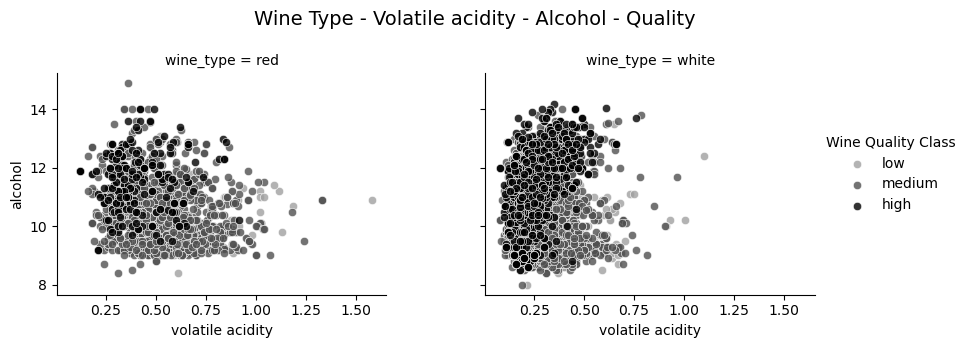

In [30]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('black', 4)[1:])
g.map(sns.scatterplot, "volatile acidity", "alcohol", alpha=0.8, 
      edgecolor='white', linewidth=0.5,)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Volatile acidity - Alcohol - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

C:\Users\piotr\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


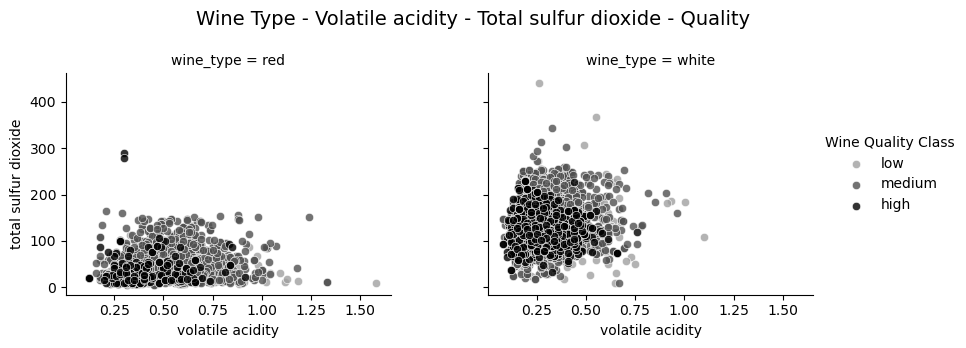

In [31]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('black', 4)[1:])
g.map(sns.scatterplot, "volatile acidity", "total sulfur dioxide", alpha=0.8, 
      edgecolor='white', linewidth=0.5,)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Volatile acidity - Total sulfur dioxide - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

## Visualizing five dimensions

Once again following a similar strategy as we followed in the previous section, to visualize data in five dimensions, we leverage various plotting components. Let’s use depth, hue and size to represent three of the data dimensions besides regular axes representing the other two dimensions. Since we use the notion of size, we will be basically plotting a three dimensional bubble chart.

Text(0.5, 0, 'Fixed Acidity')

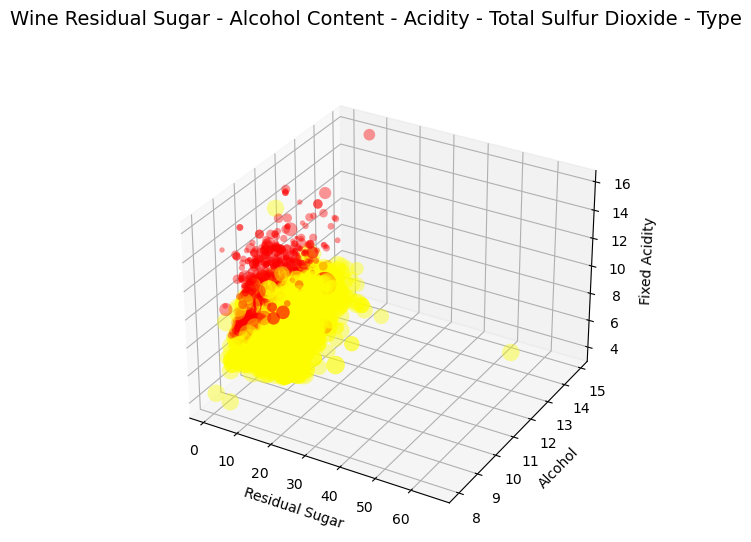

In [32]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type', fontsize=14)

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color, size in zip(data_points, colors, ss):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

C:\Users\piotr\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


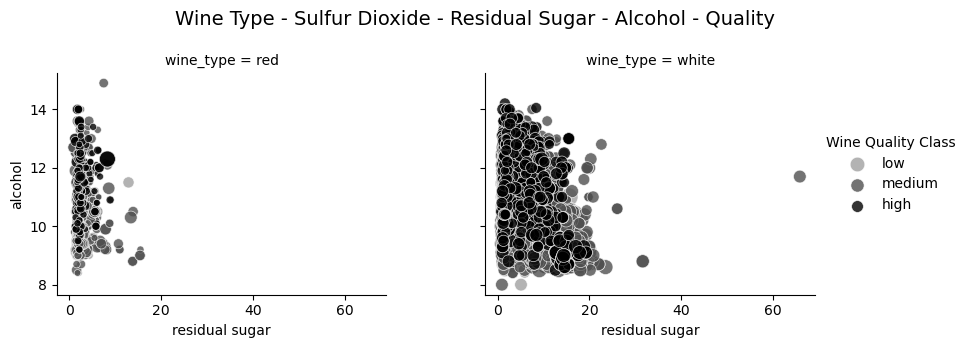

In [33]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('black', 4)[1:])
g.map(sns.scatterplot, "residual sugar", "alcohol", alpha=0.8, 
      edgecolor='white', linewidth=0.5, size=wines['total sulfur dioxide']*10, sizes=(20, 200))
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

## Visualizing six dimensions

Now, let’s add another data dimension in our visualizations. We will leverage depth, hue, size and shape besides our regular two axes to depict all the six data dimensions.

In [ ]:
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type - Quality', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]
markers = [',' if q == 'high' else 'x' if q == 'medium' else 'o' for q in list(wines['quality_label'])]

for data, color, size, mark in zip(data_points, colors, ss, markers):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size, marker=mark)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

C:\Users\piotr\AppData\Local\Temp\ipykernel_2276\2127194094.py:16: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size, marker=mark)


In [ ]:
g = sns.FacetGrid(wines, row='wine_type', col="quality", hue='quality_label', size=4)
g.map(sns.scatterplot,  'residual sugar', 'alcohol', alpha=0.5, 
      edgecolor='k', linewidth=0.5, size=wines['total sulfur dioxide']*2)
fig = g.fig 
fig.set_size_inches(18, 8)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality Class - Quality Rating', fontsize=14)
l = g.add_legend(title='Wine Quality Class')